# **Data Exploration**

Import các thư viện cần thiết.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys, os
sys.path.append("..")

from src.data_processing import load_csv_numpy

Đọc dữ liệu từ file csv

In [2]:
train_path = ("../data/raw/aug_train.csv")
col_names, data_aug = load_csv_numpy(train_path)

In [3]:
print(col_names)

['enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


In [4]:
data_aug

array([['8949', 'city_103', '0.92', ..., '1', '36', '1.0'],
       ['29725', 'city_40', '0.7759999999999999', ..., '>4', '47', '0.0'],
       ['11561', 'city_21', '0.624', ..., 'never', '83', '0.0'],
       ...,
       ['24576', 'city_103', '0.92', ..., '4', '44', '0.0'],
       ['5756', 'city_65', '0.802', ..., '2', '97', '0.0'],
       ['23834', 'city_67', '0.855', ..., '1', '127', '0.0']],
      shape=(19158, 14), dtype='<U23')

## 1. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
print("Kích thước dữ liệu", data_aug.shape)

Kích thước dữ liệu (19158, 14)


## 2. Khám phá các dòng dữ liệu

### 2.1 Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa đặc biệt không?


In [6]:
# 3 dòng đầu tiên
print(data_aug[:3, :])

[['8949' 'city_103' '0.92' 'Male' 'Has relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '>20' '' '' '1' '36' '1.0']
 ['29725' 'city_40' '0.7759999999999999' 'Male' 'No relevent experience'
  'no_enrollment' 'Graduate' 'STEM' '15' '50-99' 'Pvt Ltd' '>4' '47'
  '0.0']
 ['11561' 'city_21' '0.624' '' 'No relevent experience'
  'Full time course' 'Graduate' 'STEM' '5' '' '' 'never' '83' '0.0']]


- Mỗi dòng trong bảng dữ liệu tương ứng với **một ứng viên** cùng với:
   - thông tin thành phố (`city`, `city_development_index`),
   - giới tính, trình độ học vấn, chuyên ngành,
   - số năm kinh nghiệm, loại công ty, quy mô công ty,
   - số giờ training (`training_hours`),
   - và nhãn `target` cho biết ứng viên **có muốn đổi việc không**.
- Thông thường không có “dòng đặc biệt”.

### 2.2 Có dòng nào bị trùng lặp không?

In [7]:
n_rows = data_aug.shape[0]

unique_rows, indices, counts = np.unique(data_aug, axis=0, return_index=True, return_counts=True)
n_unique = unique_rows.shape[0]
n_duplicate_rows = np.sum(counts > 1)

print("Tổng số dòng:", n_rows)
print("Số dòng phân biệt:", n_unique)
print("Số dòng xuất hiện lặp lại:", n_duplicate_rows)

Tổng số dòng: 19158
Số dòng phân biệt: 19158
Số dòng xuất hiện lặp lại: 0


## 3. Khám phá các cột dữ liệu

### 3.1 Dữ liệu có những cột nào?

In [8]:
print(col_names)

['enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


### 3.2 Ý nghĩa của các cột dữ liệu

- `enrollee_id`: ID của ứng viên.
- `city`: Mã thành phố làm việc.
- `city_development_index`: Mức độ phát triển của thành phố.
- `gender`: Giới tính.
- `relevent_experience`: Ứng viên có kinh nghiệm liên quan đến Data Science hay không.
- `enrolled_university`: Trạng thái học đại học hiện tại.
- `education_level`: Trình độ học vấn.
- `major_discipline`: Chuyên ngành học.
- `experience`: Số năm kinh nghiệm làm việc.
- `company_size`: Quy mô công ty hiện tại.
- `company_type`: Loại hình công ty.
- `last_new_job`: Số năm kể từ lần đổi việc gần nhất.
- `training_hours`: Số giờ training đã tham gia.
- `target`: Nhãn mục tiêu (0: không đổi việc, 1: muốn đổi việc).

### 3.3 Kiểu dữ liệu hiện tại của các cột là gì?

Vì đọc bằng NumPy với `dtype=str`, toàn bộ dữ liệu đang là chuỗi.  
Ta sẽ phân loại **kiểu logic** của từng cột:
- Numerical: có thể chuyển sang số `float` cho phần lớn giá trị (không tính missing).
- Categorical: còn lại.

Bộ dữ liệu gốc chỉ có một vài cột thật sự numeric (`city_development_index`, `training_hours`).  
Các cột như `experience`, `company_size`, `last_new_job` là **ordinal** được mã hoá bằng chuỗi, ta sẽ chuyển sang numeric ở bước tiền xử lý.

### 3.4 Tỉ lệ dữ liệu bị thiếu (missing data) trong mỗi cột là bao nhiêu?

In [9]:
n_rows = data_aug.shape[0]
print("Thống kê missing values theo cột")
for j, name in enumerate(col_names):
    col = data_aug[:, j]
    mask_na = np.isin(col, "")
    n_na = mask_na.sum()
    print(f"{name:25s}: missing = {n_na:6d} ({n_na/n_rows:.2%})")

Thống kê missing values theo cột
enrollee_id              : missing =      0 (0.00%)
city                     : missing =      0 (0.00%)
city_development_index   : missing =      0 (0.00%)
gender                   : missing =   4508 (23.53%)
relevent_experience      : missing =      0 (0.00%)
enrolled_university      : missing =    386 (2.01%)
education_level          : missing =    460 (2.40%)
major_discipline         : missing =   2813 (14.68%)
experience               : missing =     65 (0.34%)
company_size             : missing =   5938 (30.99%)
company_type             : missing =   6140 (32.05%)
last_new_job             : missing =    423 (2.21%)
training_hours           : missing =      0 (0.00%)
target                   : missing =      0 (0.00%)


### 3.5 Phân bố target

Phân bố target (value, count, ratio):
0 14381 0.7506524689424784
1 4777 0.24934753105752167


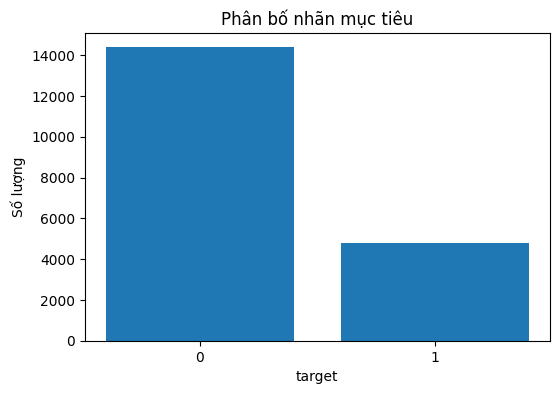

In [10]:
col_names_list = col_names.tolist()
target_col = data_aug[:, col_names_list.index("target")].astype(float).astype(int)

vals, counts = np.unique(target_col, return_counts=True)
print("Phân bố target (value, count, ratio):")
for v, c in zip(vals, counts):
    print(v, c, c/len(target_col))

plt.figure(figsize=(6, 4))
plt.bar(vals, counts)
plt.xticks(vals)
plt.xlabel("target")
plt.ylabel("Số lượng")
plt.title("Phân bố nhãn mục tiêu")
plt.show()

## 4. Các câu hỏi có ý nghĩa

### Câu hỏi 1: Ứng viên có *relevant experience* có xu hướng đổi việc nhiều hơn không?

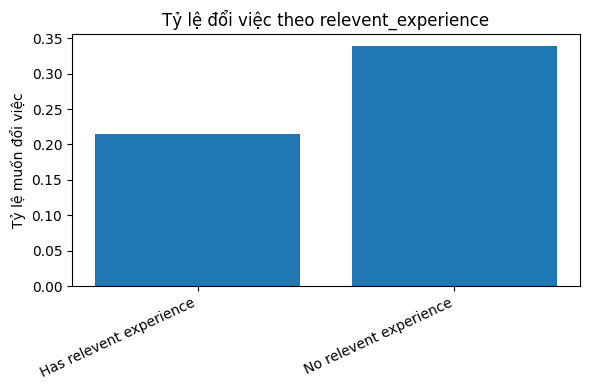

In [11]:
relex = data_aug[:, col_names_list.index("relevent_experience")]
y = target_col

uniq = np.unique(relex)
rates = []
counts = []
for u in uniq:
    mask = relex == u
    counts.append(mask.sum())
    if mask.sum() > 0:
        rates.append(y[mask].mean())
    else:
        rates.append(0.0)

x = np.arange(len(uniq))
plt.figure(figsize=(6, 4))
plt.bar(x, rates)
plt.xticks(x, uniq, rotation=25, ha="right")
plt.ylabel("Tỷ lệ muốn đổi việc")
plt.title("Tỷ lệ đổi việc theo relevent_experience")
plt.tight_layout()
plt.show()

Nhận xét: Nhóm "Has relevent experience" có tỷ lệ target=1 thấp hơn so với "No relevent experience

### Câu hỏi 2: Số năm kinh nghiệm (`experience`) ảnh hưởng thế nào đến xu hướng đổi việc?

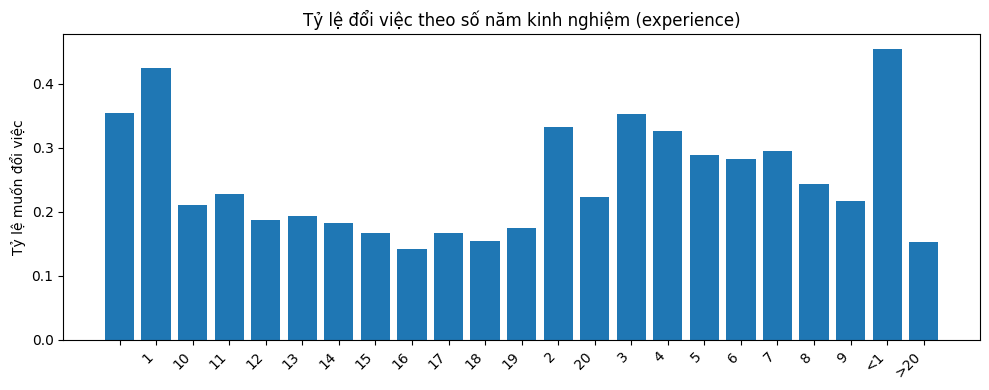

In [12]:
exp_raw = data_aug[:, col_names_list.index("experience")]
y = target_col

uniq = np.unique(exp_raw)
rates = []
for u in uniq:
    mask = exp_raw == u
    if mask.sum() > 0:
        rates.append(y[mask].mean())
    else:
        rates.append(0.0)
    # print(u, "-> count =", mask.sum(), ", rate target=1 =", y[mask].mean() if mask.sum() > 0 else 0)

x = np.arange(len(uniq))
plt.figure(figsize=(10, 4))
plt.bar(x, rates)
plt.xticks(x, uniq, rotation=45, ha="right")
plt.ylabel("Tỷ lệ muốn đổi việc")
plt.title("Tỷ lệ đổi việc theo số năm kinh nghiệm (experience)")
plt.tight_layout()
plt.show()

Nhận xét: Những người mới đi làm `<1`, `1`, `2` có tỷ lệ cao hơn so với `>10`, `>20`

### Câu hỏi 3: Mức độ phát triển của thành phố (`city_development_index`) có liên quan đến việc đổi việc?

Low -> count = 6445 , rate target=1 = 0.42637703646237396
Medium -> count = 10176 , rate target=1 = 0.1733490566037736
High -> count = 2537 , rate target=1 = 0.10445407962160032


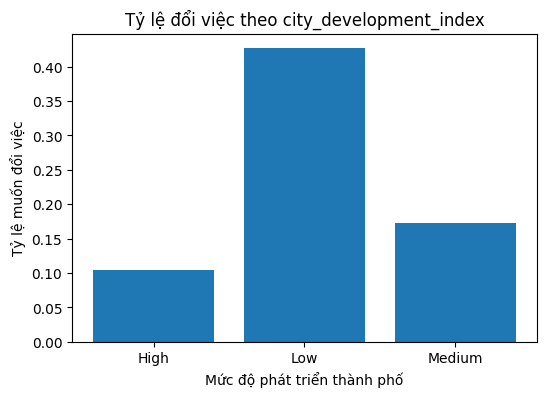

In [13]:
city_dev = data_aug[:, col_names_list.index("city_development_index")].astype(float)
y = target_col

# chia thành 3 nhóm: Low / Medium / High
q1, q2 = np.quantile(city_dev, [0.33, 0.66])

def bucket_city(v):
    if v <= q1:
        return "Low"
    elif v <= q2:
        return "Medium"
    else:
        return "High"

buckets = np.array([bucket_city(v) for v in city_dev])

for g in ["Low", "Medium", "High"]:
    mask = buckets == g
    print(g, "-> count =", mask.sum(), ", rate target=1 =", y[mask].mean())

uniq = np.unique(buckets)
rates = [y[buckets == u].mean() for u in uniq]

plt.figure(figsize=(6, 4))
plt.bar(uniq, rates)
plt.xlabel("Mức độ phát triển thành phố")
plt.ylabel("Tỷ lệ muốn đổi việc")
plt.title("Tỷ lệ đổi việc theo city_development_index")
plt.show()

Nhận xét: Mức độ phát triển thành phố ở mức trung bình có tỉ lệ thay đổi việc làm cao hơn hẳn so với mức cao và thấp, tỉ lệ thấp nhất là mức thấp.

### Câu hỏi 4: Số giờ training (`training_hours`) có “giảm” xu hướng đổi việc không?

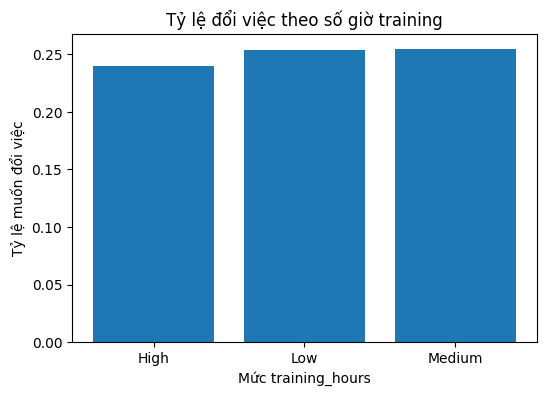

In [14]:
training_hours = (data_aug[:, col_names_list.index("training_hours")]).astype(float)
y = target_col

q1, q2 = np.quantile(training_hours, [0.33, 0.66])

def bucket_tr(v):
    if v <= q1:
        return "Low"
    elif v <= q2:
        return "Medium"
    else:
        return "High"

buckets_tr = np.array([bucket_tr(v) for v in training_hours])

for g in ["Low", "Medium", "High"]:
    mask = buckets_tr == g
    # print(g, "-> count =", mask.sum(), ", rate target=1 =", y[mask].mean())

uniq_tr = np.unique(buckets_tr)
rates_tr = [y[buckets_tr == u].mean() for u in uniq_tr]

plt.figure(figsize=(6, 4))
plt.bar(uniq_tr, rates_tr)
plt.xlabel("Mức training_hours")
plt.ylabel("Tỷ lệ muốn đổi việc")
plt.title("Tỷ lệ đổi việc theo số giờ training")
plt.show()

Nhận xét: Số giờ training ở mức High có tỉ lệ thay đổi công việc thấp hơn Low và Medium, cho thấy được số giờ training

càng nhiều cũng khiến "giảm" xu hướng thay đổi việc